In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from yolov4.tf import YOLOv4

In [3]:
tf.__version__

'2.3.1'

In [4]:
# path_weights = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\yolov3.weights"
# path_cfg = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\cfg\yolov3.cfg"

In [5]:
path_weights = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom_final.weights"
path_cfg = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom.cfg"
path_cfg_neu = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\Evaluation\our-yolov4-tiny-custom_for_tf.cfg"

In [208]:
img_path = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\preprocessing\data\Soldat_35.jpg"

In [192]:
img_path_2 = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\preprocessing\data\Haber_bosch_2.jpg"

In [168]:
img_1 = cv2.imread(img_path)
img_2 = cv2.imread(img_path_2)
imgs = np.array([img_1,img_2])
imgs.shape

(2, 416, 416, 3)

In [179]:
f(imgs)

0
1


array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.9173072, 0.       , 0.       , 0.       ,
        0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.9106477, 0.       , 0.       , 0.       ,
        0.       , 0.       ]], dtype=float32)

In [8]:
path_class_txt = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\AISS_CV\preprocessing\data\classes.txt"
classes = []
with open(path_class_txt, 'r') as f:
    classes = f.read().splitlines()

In [9]:
# path_class_txt = r"C:\Users\nicky\Desktop\Studium\Master\4. Semester\AISS - Computer Vision\GitHubRepo\darknet\data\coco.names"
# classes = []
# with open(path_class_txt, 'r') as f:
#     classes = f.read().splitlines()

In [10]:
net = cv2.dnn.readNet(path_weights,path_cfg)

In [209]:
img = cv2.imread(img_path)
height, width, _ = img.shape

In [141]:
blob = cv2.dnn.blobFromImage(np.array(imgs[0]), 1/255, (416,416), (0,0,0), swapRB=True, crop = False)

In [41]:
blob.shape

(1, 3, 416, 416)

In [13]:
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()

In [14]:
print(output_layers_names)

['yolo_30', 'yolo_37']


In [15]:
layerOutputs = net.forward(output_layers_names)

In [16]:
cv2.imshow('',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [174]:
boxes = []
confidence = []
class_ids = []
score = []
score_max = []
preds = []

In [181]:
def f(X):
    preds = []
    for i in range(0,X.shape[0]):
        print(i)
        score = []
        score_max = []
#         cv2.imshow('',X[i])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        blob = cv2.dnn.blobFromImage(X[i], 1/255, (416,416), (0,0,0), swapRB=True, crop = False)
        net.setInput(blob)
        output_layers_names = net.getUnconnectedOutLayersNames()
        layerOutputs = net.forward(output_layers_names)
        for output in layerOutputs:
            for detection in output:
                score_ = detection[5:] #removing first four entries since they correspond to postion of bbox
                score.append([score_])
                score_max.append(np.max(score_))
        if i==0:
            preds = np.array((score[np.argmax(score_max)])).reshape(14,1)
        else:
            preds = np.append(preds,np.array(score[np.argmax(score_max)]).reshape(14,1))
            
    return preds.reshape(X.shape[0],14)

In [65]:
img.shape

(416, 416, 3)

In [128]:
a = np.array([2,1]).reshape(2,1)
a
b = np.array([3,4]).reshape(2,1)
c = np.append(a, b, axis = 1)
c

array([[2, 3],
       [1, 4]])

In [67]:
img[:,:,1].shape

(416, 416)

In [56]:
f(img)

(416, 416, 3)


0.9173072

In [64]:
sum(score[np.argmax(score_max)][0]/np.max(score[np.argmax(score_max)]))

1.0

In [63]:
score[np.argmax(score_max)][0]/np.max(score[np.argmax(score_max)])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
score

In [33]:
score_final = 

In [34]:
score_final

1244

In [38]:
score[score_final][0]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.9173072, 0.       , 0.       , 0.       ,
       0.       , 0.       ], dtype=float32)

In [210]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img, f, hide_color=0, num_samples= 500)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


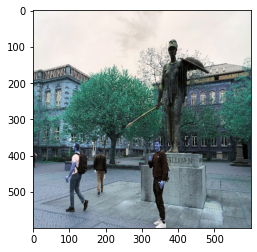

In [211]:
plt.imshow(img)

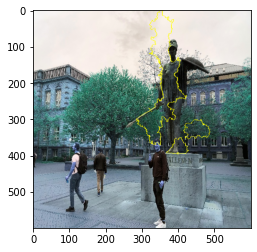

In [212]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=8, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [52]:
f(np.array(img))

(416, 416, 3)


0.9173072

In [27]:
for output in layerOutputs:
    for detection in output:
        score = detection[5:] #removing first four entries since they correspond to postion of bbox
        class_id = np.argmax(score)
        confidence_ = score[class_id]
        if confidence_ > 0.4:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(center_x -w/2)
            y = int(center_y -w/2)
            
            boxes.append([x,y,w,h])
            confidence.append(float(confidence_))
            class_ids.append(class_id)


14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
1

In [19]:
len(boxes)

1

In [20]:
blob.shape

(1, 3, 416, 416)

In [21]:
indexes = cv2.dnn.NMSBoxes(boxes, confidence, 0.3, 0.4)

In [22]:
indexes

array([[0]], dtype=int32)

In [23]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes),3))

In [24]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidence[i],2))
    color = colors[i]
    
    cv2.rectangle(img, (y,x), (x+w, y+h), color, 1)
    cv2.putText(img, label + " " + confi, (x, y+20), font,2,(0,0,0),1)

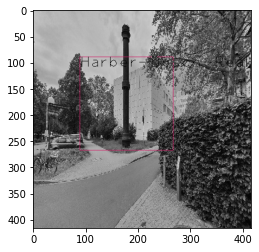

In [25]:
plt.imshow(img)